<h1 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:350%;text-align:center;border-radius: 15px 50px;">Network analysis : Policy effect on scientific collaboration</h1>

# Table of content

* [1. Introduction](#1)
* [2. Libraries and Data](#1.1)
* [3. The pre-policy network analysis](#2)
* [4. Centrality measures of the pre graph](#3)
* [5. Finding communities in the pre graph](#4)
* [6. The post-policy network analysis](#5)
* [7. Centrality measures of the post graph](#6)
* [8. Finding communities in the post graph](#7)

<a id="1"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Introduction</h3>

We have a network consisting of individual agents, specifically scientists. The cluster
has been observed during two subsequent periods of time - before and after a policy
intervention. In the first period, no individuals were treated, while in the second
period, all individuals were treated. The data for this analysis consists of two datasets
that can be linked through individual identifiers. The first dataset, provides time-
invariant information on individual agents, including their identifier, coordinator
status, core member status, and gender. The second dataset, provides time-varying
information on dyads, including the source and target node identifiers, and the nature
of their scientific collaboration before and after treatment. All bilateral scientific
collaborations are undirected, with each dyad appearing twice, once in each direction.
Our objective in this analysis is to explore the impact of the policy intervention on the
scientific collaboration of the network cluster, using a social network analysis
approach. 

<a id="12"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries and Data</h3>

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Import the graph from a CSV file
nodes = pd.read_csv(r"C:\Users\moude\Desktop\Master\M1\S2\Analyse des réseaux\Travail Analyse des réseaux  consignes et données\nodes_cluster_C.csv", sep = ";")
edges = pd.read_csv(r"C:\Users\moude\Desktop\Master\M1\S2\Analyse des réseaux\Travail Analyse des réseaux  consignes et données\edges_cluster_C.csv", sep = ";")

In [3]:
print(nodes.shape)
print(edges.shape)

(247, 4)
(1512, 4)


We hanve 247 nodes and we have 1512 edges.

### Data merging

In [3]:
## Renaming the source column
nodes.rename({'id':'source'}, axis=1, inplace=True)

In [4]:
# performing an inner join on column 'source'
data = pd.merge(nodes, edges, on='source')

In [5]:
# change the order of the columns
data = data.reindex(columns=['source', 'target', 'pre_link', 'post_link', 'gender','coord', 'core'])

In [6]:
data.head(10)

,source,target,pre_link,post_link,gender,coord,core
0,44392,2667,0,1,0,0,0
1,44392,8993,0,1,0,0,0
2,44392,9761,0,1,0,0,0
3,44392,9763,0,1,0,0,0
4,44392,10380,0,1,0,0,0
5,44392,10387,1,1,0,0,0
6,44392,44358,0,1,0,0,0
7,44392,44361,1,1,0,0,0
8,44392,44363,1,0,0,0,0
9,44392,44364,0,1,0,0,0


In [7]:
# Verify if the number of nodes is the same
data.source.nunique()

244

The number of nodes droped by 3, so we can conclude that those nodes have no collaborations.

### Properties of the data

In [8]:
print(data['pre_link'].value_counts())
print(data['post_link'].value_counts())

1    844
0    668
Name: pre_link, dtype: int64
1    1100
0     412
Name: post_link, dtype: int64


Before the policy there was 844 connection between the scientists and after the policy that number increased to 1100. We can say that the policy had an effect but we don't know the details of the effect on each network, so we have to do some analysis on the networks.

In [9]:
df_unique_sources = data.drop_duplicates(subset=['source'])
print(df_unique_sources['gender'].value_counts())
print(df_unique_sources['core'].value_counts())
print(df_unique_sources['coord'].value_counts())

0    190
1     54
Name: gender, dtype: int64
0    194
1     50
Name: core, dtype: int64
0    243
1      1
Name: coord, dtype: int64


- The females represent approximately 30% of the scientists, with the network beig composed of 54 females and 190. We will see if the policy will effect the role of the females in the network.

- We have 50 core members and 1 coordinator. Their role in the network will also be analysed.

In [10]:
df_unique_sources[(df_unique_sources['gender'] == 1) & (df_unique_sources['core'] == 1)]

,source,target,pre_link,post_link,gender,coord,core
976,40736,10380,0,1,1,1,1
1152,10529,10387,1,1,1,0,1
1226,75725,10524,0,1,1,0,1
1251,75139,10524,0,1,1,0,1
1272,44483,10524,1,1,1,0,1
1311,44476,10531,1,0,1,0,1
1348,40773,40747,0,1,1,0,1
1382,44484,40769,0,1,1,0,1
1486,44498,44476,1,0,1,0,1
1493,44489,44484,1,0,1,0,1


We can see that only 10 females are core members, which is 20 % of the total number of core members.

### Creating the graphs

In [11]:
# create an empty graph
G_pre = nx.Graph()

# add nodes to the graph with their attributes
nodes = set(data['source'])
for node in nodes:
    node_df = data.loc[data['source'] == node]
    gender = node_df['gender'].values[0]
    coord = node_df['coord'].values[0]
    core = node_df['core'].values[0]
    G_pre.add_node(node, gender=gender, coord=coord, core=core)

# add edges to the graph
for _, row in data.loc[data['pre_link'] == 1].iterrows():
    G_pre.add_edge(row['source'], row['target'])
    
# printinf the number of nodes and edges of the graph
print("Number of nodes:", G_pre.number_of_nodes())
print("Number of edges:", G_pre.number_of_edges())

Number of nodes: 244
Number of edges: 422


In [12]:
# create an empty graph
G_post = nx.Graph()

# add nodes to the graph with their attributes
nodes = set(data['source'])
for node in nodes:
    node_df = data.loc[data['source'] == node]
    gender = node_df['gender'].values[0]
    coord = node_df['coord'].values[0]
    core = node_df['core'].values[0]
    G_post.add_node(node, gender=gender, coord=coord, core=core)

# add edges to the graph
for _, row in data.loc[data['post_link'] == 1].iterrows():
    G_post.add_edge(row['source'], row['target'])
    
# printinf the number of nodes and edges of the graph
print("Number of nodes:", G_post.number_of_nodes())
print("Number of edges:", G_post.number_of_edges())

Number of nodes: 244
Number of edges: 550


<a id="3"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">The pre-policy network analysis</h3>

### The connectivity of the graph

In [13]:
# Check if the graph is connected
print(nx.is_connected(G_pre))

False


The graph is not connected, so we can't say that there is a path between any two nodes in the graph, which is expected because it's impossible for each individual scientist to collaborate with every scientist in the network.

In [14]:
# compute the number of connected components
num_components = nx.number_connected_components(G_pre)

# print the number of connected components
print('Number of connected components:', num_components)

Number of connected components: 60


We have 60 subgraphs, which can be interpreted as groupes of scientists that work with each other regularly and work on the same subjects matters.

In [15]:
# the density of the graph
density = nx.density(G_pre)
print("Graph density:", density)

Graph density: 0.014234635363961412


A density of 0.014 in a graph with 244 nodes indicates that the graph is relatively sparse. 

In [16]:
# the maximum number of edges
244 * (244 - 1) / 2

29646.0

the graph has only 422 edges out of a possible 29,566, which is relatively few. This suggests that the nodes in the graph are not very strongly connected to one another, and there may be many disconnected subgraphs or isolated nodes. 

In [17]:
avg_degree = sum([degree for node, degree in G_pre.degree()])/G_pre.number_of_nodes()
print("Average degree : ", avg_degree)

Average degree :  3.459016393442623


In a graph with n = 244 nodes, the maximum degree of any node is 243. An average degree of 3.459 is relatively small compared to the maximum degree of 243, which suggests that the nodes in the graph are not very strongly connected to one another.
So the average collaborations between scientists is approximatly 4.

In [18]:
avg_clustering = nx.average_clustering(G_pre)
print("Average local clustering : ", avg_clustering)

Average local clustering :  0.41222387518192716


An average local clustering coefficient of 0.41 in a graph suggests that the nodes in the graph tend to be relatively well-connected to one another, forming relatively tightly knit clusters. a high average local clustering coefficient can indicate that the graph has a number of tightly-knit subgroups or communities, with relatively few connections between them, which we theorised before, that there are subgraphs of scientists that work very closely with each other.

In [19]:
global_clustering = nx.transitivity(G_pre)
print("Transitivity : ", global_clustering)

Transitivity :  0.4409884959522795


A transitivity value of 0.4409 indicates that the proportion of connected triples in the graph that actually form triangles is around 44.09%. This means that the graph has a moderate degree of clustering, where nodes tend to be connected to one another through common neighbors or shared edges.

### The most connected nodes

In [20]:
# the degrees of each node
degrees = dict(G_pre.degree)

# the degrees in descending order
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# the 10% nodes with the highest degrees
top_24_degree = sorted_degrees[:24]

In [22]:
# Getting the attributes of those nodes 
pre_data = data[data['pre_link']==1]
# define a list of node IDs to search for
nodes_24 = [t[0] for t in top_24_degree]

# creating a dictionary
nodes_dict = {}

# Extracting the attributes
for index, row in pre_data.iterrows():
    if row['source'] in nodes_24:
        nodes_dict[row['source']] = {
            'gender': row['gender'],
            'coord': row['coord'],
            'core': row['core']
        }
        
# Adding the degree to the values of the dictionary
for key, value in top_24_degree:
    if key in nodes_dict:
        nodes_dict[key]['degree'] = value

In [23]:
nodes_dict = sorted(nodes_dict.items(), key=lambda x: x[1]['degree'], reverse=True)
nodes_dict = dict(nodes_dict )

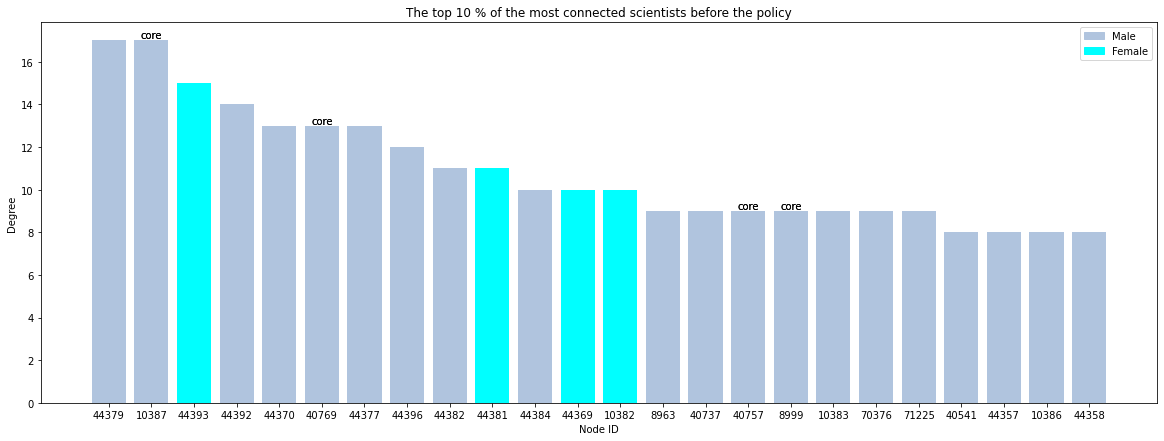

In [24]:
# Create a wider and shorter figure
plt.figure(figsize=(20, 15))
plt.gca().set_aspect(0.5)

# Sort the nodes_dict by degree values
sorted_nodes_dict = dict(sorted(nodes_dict.items(), key=lambda item: item[1]['degree'], reverse=True))

# Extract the degrees and genders of the nodes
degrees = [d['degree'] for d in sorted_nodes_dict.values()]
genders = [d['gender'] for d in sorted_nodes_dict.values()]

# Define the colors based on gender
colors = ['lightsteelblue' if g == 0 else 'aqua' for g in genders]

# Define the labels based on core and coord
labels = []
for node_id, nodes_data in sorted_nodes_dict.items():
    label = ''
    if nodes_data['core'] == 1:
        label += 'core'
    if nodes_data['coord'] == 1:
        label += 'coord'
    labels.append(label)

# Create the bar plot
plt.bar(range(len(sorted_nodes_dict)), degrees, color=colors)
plt.xticks(range(len(sorted_nodes_dict)), sorted_nodes_dict.keys())
plt.ylabel('Degree')
plt.xlabel('Node ID')
plt.title('The top 10 % of the most connected scientists before the policy')

# Add the labels to the plot
for i, label in enumerate(labels):
    if label:
        plt.text(i, degrees[i], label, ha='center', va='bottom')
        
# Add a gender legend
handles = [plt.Rectangle((0,0),1,1, color='lightsteelblue'), plt.Rectangle((0,0),1,1, color='aqua')]
lab_legend = ['Male', 'Female']
plt.legend(handles, lab_legend)

# Add the labels to the plot
for i, label in enumerate(labels):
    if label:
        plt.text(i, degrees[i], label, ha='center', va='bottom')

plt.show()


The first thing we can see is the low number of the females in the the top 10 % of the nodes that are most connected and we allso have 4 core members of this list, none of them are female. 
The pecentages are the following :

    - 7.4 % of the females are in the top 10%.
    - 10.52 % of the males are in the top 10%.
    - 8 % of the core members are in the top 10%.
    
We can see that the males and core members are more represented than females in the top 10 % of the nodes that are most connected. We will see if those percentages will change afetr the policy.

<a id="4"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Centrality measures of the pre graph</h3>

### Closeness centrality 

In [35]:
# Compute closeness centrality and get the top 5 nodes
closeness_centrality = nx.closeness_centrality(G_pre)
# get the top 10 nodes based on their closeness centrality values
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# print the top 10 nodes
for node, closeness in top_10_closeness:
    print(f"Node {node} has a closeness centrality of {closeness}")

Node 44377 has a closeness centrality of 0.1344890990281061
Node 40767 has a closeness centrality of 0.13214608336559555
Node 40771 has a closeness centrality of 0.13214608336559555
Node 44369 has a closeness centrality of 0.12856246076585057
Node 44393 has a closeness centrality of 0.12394093439845073
Node 44370 has a closeness centrality of 0.1235372179997587
Node 40769 has a closeness centrality of 0.1211690924150988
Node 44382 has a closeness centrality of 0.11926391800605636
Node 44381 has a closeness centrality of 0.11741772732484805
Node 10380 has a closeness centrality of 0.11705532693187012


In [36]:
nodes_closeness = [node for node, closeness in top_10_closeness]

for node in nodes_closeness:
    attributes = G_pre.nodes[node]
    print(f"Attributes for node {node}:")
    for attribute, value in attributes.items():
        print(f"{attribute}: {value}")

Attributes for node 44377:
gender: 0
coord: 0
core: 0
Attributes for node 40767:
gender: 0
coord: 0
core: 1
Attributes for node 40771:
gender: 0
coord: 0
core: 1
Attributes for node 44369:
gender: 1
coord: 0
core: 0
Attributes for node 44393:
gender: 1
coord: 0
core: 0
Attributes for node 44370:
gender: 0
coord: 0
core: 0
Attributes for node 40769:
gender: 0
coord: 0
core: 1
Attributes for node 44382:
gender: 0
coord: 0
core: 0
Attributes for node 44381:
gender: 1
coord: 0
core: 0
Attributes for node 10380:
gender: 0
coord: 0
core: 0


Closeness centrality is a measure of how "central" a node is in a network, meaning, how easily and quickly it can access other nodes in the network. A node with a high closeness centrality is one that is able to reach many other nodes in the network with a small number of steps, while a node with a low closeness centrality is one that is relatively isolated from the rest of the network.

In our case, we have the top 10 nodes with the highest closeness centrality, all of which have very similar centrality scores. This suggests that these nodes are very central in the network and can access a large number of other nodes with only a small number of steps. Between thoses nodes there are 3 females and equaly 3 core members.

In [37]:
overlap1 = dict(top_24_degree).keys() & dict(top_10_closeness).keys()
print(overlap1)

{40769, 10380, 44369, 44382, 40767}


For the closeness centrality there are 7 nodes that exist in the top 10 % nodes that are most connected.

### Eigenvector centrality 

In [38]:
# Compute eigenvector centrality of each node
eigenvector_centrality = nx.eigenvector_centrality(G_pre)

# get the top 10 nodes based on their closeness centrality values
top_10_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# print the top 10 nodes
for node, eigenvector in top_10_eigenvector:
    print(f"Node {node} has a eigenvector centrality of {eigenvector}")

Node 10387 has a eigenvector centrality of 0.29407536788590216
Node 44393 has a eigenvector centrality of 0.2859553428321683
Node 44379 has a eigenvector centrality of 0.2618405256506455
Node 44396 has a eigenvector centrality of 0.25858587436491215
Node 44370 has a eigenvector centrality of 0.25246883102015477
Node 44382 has a eigenvector centrality of 0.2513286549745155
Node 44384 has a eigenvector centrality of 0.23691810469926716
Node 44392 has a eigenvector centrality of 0.21654427401828352
Node 10383 has a eigenvector centrality of 0.21129926088644044
Node 71225 has a eigenvector centrality of 0.20249142796005398


In [39]:
# Getting the attributes
nodes_eigenvector = [node for node, eigenvector in top_10_eigenvector]

for node in nodes_eigenvector:
    attributes = G_pre.nodes[node]
    print(f"Attributes for node {node}:")
    for attribute, value in attributes.items():
        print(f"{attribute}: {value}")

Attributes for node 10387:
gender: 0
coord: 0
core: 1
Attributes for node 44393:
gender: 1
coord: 0
core: 0
Attributes for node 44379:
gender: 0
coord: 0
core: 0
Attributes for node 44396:
gender: 0
coord: 0
core: 0
Attributes for node 44370:
gender: 0
coord: 0
core: 0
Attributes for node 44382:
gender: 0
coord: 0
core: 0
Attributes for node 44384:
gender: 0
coord: 0
core: 0
Attributes for node 44392:
gender: 0
coord: 0
core: 0
Attributes for node 10383:
gender: 0
coord: 0
core: 0
Attributes for node 71225:
gender: 0
coord: 0
core: 0


Eigenvector centrality is a measure of the influence of a node in a network. It takes into account not only the number of connections a node has, but also the importance of the nodes that it is connected to. Therefore, a high eigenvector centrality indicates that a node is connected to other important nodes in the network.

Here, Node 10387 has the highest eigenvector centrality, indicating that it is connected to other important nodes in the network. From the 10 nodes we only have one female and one core member, so these two are less connected to important nodes in the network.

In [40]:
overlap2 = dict(top_24_degree).keys() & dict(top_10_eigenvector).keys()
print(overlap2)

{44392, 10387, 44382}


For the eigenvector centrality there are 10 nodes that exist in the top 10 % nodes that are most connected.

### Betweenness centrality 

In [41]:
# Compute betweenness centrality and get the top 5 nodes
betweenness_centrality = nx.betweenness_centrality(G_pre)
# get the top 10 nodes based on their betweenness_centrality values
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# print the top 10 nodes
for node, betweenness in top_10_betweenness:
    print(f"Node {node} has a betweenness centrality of {betweenness}")

Node 40769 has a betweenness centrality of 0.0713211965737218
Node 44377 has a betweenness centrality of 0.05523882346221167
Node 40767 has a betweenness centrality of 0.03826609853545879
Node 40771 has a betweenness centrality of 0.03826609853545879
Node 40757 has a betweenness centrality of 0.036016732986429954
Node 44369 has a betweenness centrality of 0.025945561809886882
Node 10387 has a betweenness centrality of 0.019313536885103795
Node 44370 has a betweenness centrality of 0.018356001937178287
Node 44393 has a betweenness centrality of 0.014556849276422482
Node 44379 has a betweenness centrality of 0.0136723996512226


In [42]:
# Getting the attributes
nodes_betweenness = [node for node, betweenness in top_10_betweenness]

for node in nodes_betweenness:
    attributes = G_pre.nodes[node]
    print(f"Attributes for node {node}:")
    for attribute, value in attributes.items():
        print(f"{attribute}: {value}")

Attributes for node 40769:
gender: 0
coord: 0
core: 1
Attributes for node 44377:
gender: 0
coord: 0
core: 0
Attributes for node 40767:
gender: 0
coord: 0
core: 1
Attributes for node 40771:
gender: 0
coord: 0
core: 1
Attributes for node 40757:
gender: 0
coord: 0
core: 1
Attributes for node 44369:
gender: 1
coord: 0
core: 0
Attributes for node 10387:
gender: 0
coord: 0
core: 1
Attributes for node 44370:
gender: 0
coord: 0
core: 0
Attributes for node 44393:
gender: 1
coord: 0
core: 0
Attributes for node 44379:
gender: 0
coord: 0
core: 0


Betweenness centrality is a measure of the importance of a node in a network, based on how many shortest paths between pairs of nodes pass through that node. A node with high betweenness centrality means that it lies on many of the shortest paths between other nodes in the network, and as a result, it has more control over the flow of information or resources within the network.

- Node 40769 has the highest betweenness centrality, indicating that it lies on many of the shortest paths between other nodes in the network and has a high level of control over the flow of information or resources.
- Nodes 40767 and 40771 have the same betweenness centrality, suggesting that they are equally important in terms of their control over the flow of information or resources within the network.

From the 10 nodes in the top we have 2 females and 5 core members, which means that core members are the most important in the flow of information or resources within the network and non of those core members are female even though they represent 20 % of them.

In [43]:
overlap3 = dict(top_24_degree).keys() & dict(top_10_betweenness).keys()
print(overlap3)

{44369, 40769, 10387, 40767}


For the betweenness centrality there are 8 nodes that exist in the top 10 % nodes that are most connected.

<a id="5"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Finding communities in the pre graph</h3>

In [44]:
from networkx.algorithms import community 

# We will use Louvain community detection algorithm
partition = community.louvain_communities(G_pre, weight="Weight" ,resolution=0.7, seed=123)

N = len(partition)
print("The number of detected communities :" + str(N))

The number of detected communities :65


There are 65 communities, which is close to the number of subgraphs found earlier.

## Drawing the pre graph

In [73]:
pre_data = pre_data.drop('post_link', axis = 1)

In [85]:
source_gender = pre_data[["source", "gender"]]
source_gender = source_gender.set_index("source")["gender"].to_dict()
for node in G_pre.nodes():
    if node in source_gender and source_gender[node] == 1:
        G_pre.nodes[node]["color"] = "aqua"
    else:
        G_pre.nodes[node]["color"] = "lightsteelblue"

In [86]:
# node colors based on gender
node_colors = [data['color'] for node, data in G_pre.nodes(data=True)]

# node labels based on coord and core
labels = {}
for i, row in pre_data.iterrows():
    node = row['source']
    if row['coord'] == 1:
        labels[node] = 'coord'
    elif row['core'] == 1:
        labels[node] = 'core'

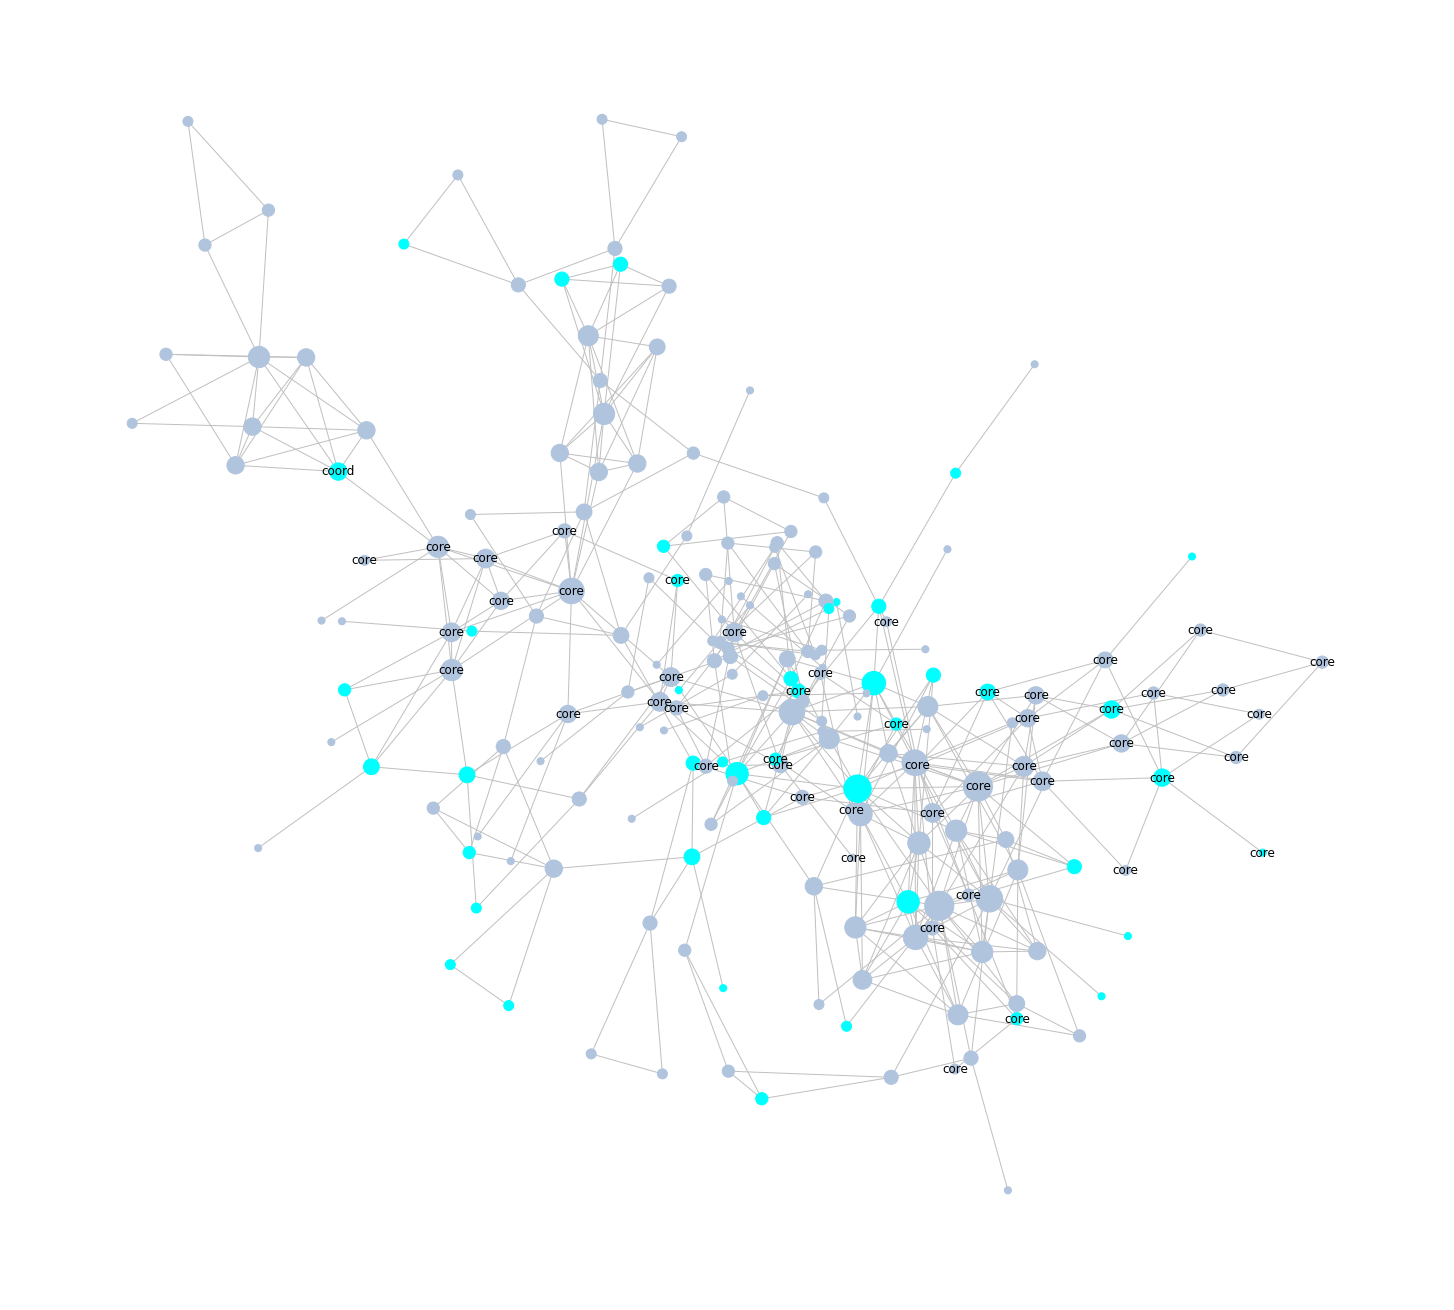

In [129]:
pos = nx.kamada_kawai_layout(G_pre)

nx.draw(G_pre, pos, node_size=[n*50 for n in dict(G_pre.degree()).values()], node_color=node_colors,edge_color='silver', with_labels=True, labels=labels)

plt.rcParams['figure.figsize'] = [20, 17]
# Set the axis to be off
plt.axis('off')
plt.show()

<a id="6"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">The post-policy network analysis</h3>

### The connectivity of the graph

In [45]:
# Check if the graph is connected
print(nx.is_connected(G_post))

False


The graph is not connected, so we can't say that there is a path between any two nodes in the graph, which is expected because it's impossible for each individual scientist to collaborate with every scientist in the network.

In [46]:
# compute the number of connected components
num_components = nx.number_connected_components(G_post)

# print the number of connected components
print('Number of connected components:', num_components)

Number of connected components: 36


We have 17 subgraphs, which can be interpreted as groupes of scientists that work with each other regularly and work on the same subjects matters.

In [47]:
# the density of the graph
density = nx.density(G_post)
print("Graph density:", density)

Graph density: 0.01855224988194023


A density of 0.0185 in a graph with 244 nodes indicates that the graph is relatively sparse. 

In [48]:
# the maximum number of edges
244 * (244 - 1) / 2

29646.0

the graph has only 618 edges out of a possible 29,566, which is relatively few. This suggests that the nodes in the graph are not very strongly connected to one another, and there may be many disconnected subgraphs or isolated nodes. 

In [49]:
avg_degree = sum([degree for node, degree in G_post.degree()])/G_post.number_of_nodes()
print("Average degree : ", avg_degree)

Average degree :  4.508196721311475


In a graph with n = 244 nodes, the maximum degree of any node is 243. An average degree of 4.508 is relatively small compared to the maximum degree of 243, which suggests that the nodes in the graph are not very strongly connected to one another.
So the average collaborations between scientists is 4.

In [50]:
avg_clustering = nx.average_clustering(G_post)
print("Average local clustering : ", avg_clustering)

Average local clustering :  0.4809335547649592


An average local clustering coefficient of 0.480 in a graph suggests that the nodes in the graph tend to be relatively well-connected to one another, forming relatively tightly knit clusters. a high average local clustering coefficient can indicate that the graph has a number of tightly-knit subgroups or communities, with relatively few connections between them, which we theorised before, that there are subgraphs of scientists that work very closely with each other.

In [51]:
global_clustering = nx.transitivity(G_post)
print("Transitivity : ", global_clustering)

Transitivity :  0.44901564866229177


A transitivity value of 0.449 indicates that the proportion of connected triples in the graph that actually form triangles is around 44.9%. This means that the graph has a moderate degree of clustering, where nodes tend to be connected to one another through common neighbors or shared edges.

### The most connected nodes

In [52]:
# the degrees of each node
degrees = dict(G_post.degree)

# the degrees in descending order
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

# the 10% nodes with the highest degrees
top_24_degree = sorted_degrees[:24]

In [53]:
# Getting the attributes of those nodes 
post_data = data[data['post_link']==1]

# define a list of node IDs to search for
nodes_24 = [t[0] for t in top_24_degree]

# creating a dictionary
nodes_dict = {}

# Extracting the attributes
for index, row in post_data.iterrows():
    if row['source'] in nodes_24:
        nodes_dict[row['source']] = {
            'gender': row['gender'],
            'coord': row['coord'],
            'core': row['core']
        }
        
# Adding the degree to the values of the dictionary
for key, value in top_24_degree:
    if key in nodes_dict:
        nodes_dict[key]['degree'] = value

In [54]:
nodes_dict = sorted(nodes_dict.items(), key=lambda x: x[1]['degree'], reverse=True)
nodes_dict = dict(nodes_dict )

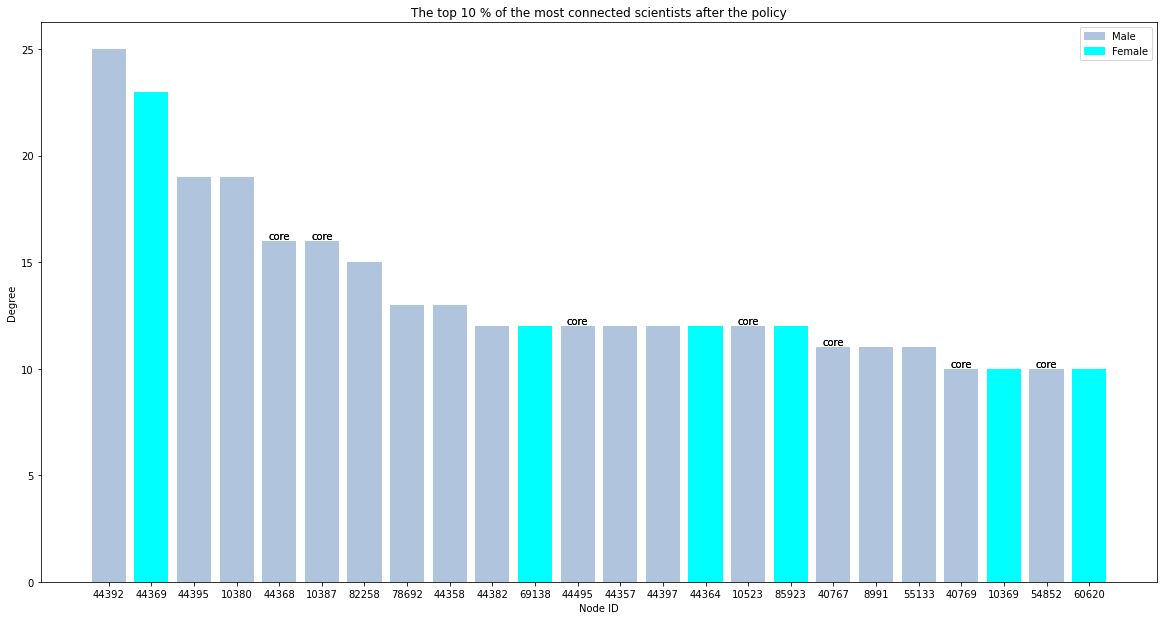

In [55]:
# Create a wider and shorter figure
plt.figure(figsize=(20, 15))
plt.gca().set_aspect(0.5)

# Sort the nodes_dict by degree values
sorted_nodes_dict = dict(sorted(nodes_dict.items(), key=lambda item: item[1]['degree'], reverse=True))

# Extract the degrees and genders of the nodes
degrees = [d['degree'] for d in sorted_nodes_dict.values()]
genders = [d['gender'] for d in sorted_nodes_dict.values()]

# Define the colors based on gender
colors = ['lightsteelblue' if g == 0 else 'aqua' for g in genders]

# Define the labels based on core and coord
labels = []
for node_id, nodes_data in sorted_nodes_dict.items():
    label = ''
    if nodes_data['core'] == 1:
        label += 'core'
    if nodes_data['coord'] == 1:
        label += 'coord'
    labels.append(label)

# Create the bar plot
plt.bar(range(len(sorted_nodes_dict)), degrees, color=colors)
plt.xticks(range(len(sorted_nodes_dict)), sorted_nodes_dict.keys())
plt.ylabel('Degree')
plt.xlabel('Node ID')
plt.title('The top 10 % of the most connected scientists after the policy')

# Add the labels to the plot
for i, label in enumerate(labels):
    if label:
        plt.text(i, degrees[i], label, ha='center', va='bottom')
        
# Add a gender legend
handles = [plt.Rectangle((0,0),1,1, color='lightsteelblue'), plt.Rectangle((0,0),1,1, color='aqua')]
lab_legend = ['Male', 'Female']
plt.legend(handles, lab_legend)

# Add the labels to the plot
for i, label in enumerate(labels):
    if label:
        plt.text(i, degrees[i], label, ha='center', va='bottom')

plt.show()


The first thing we can see is the low number of the females in the the top 10% of the nodes that are most connected and we also have 7 core members of this list, which is an increase from the pre graph that had 4 core members. 
The pecentages are the following :

    - 1.16% of the females are in the top 10%, the same as befor.
    - 1.71% of the males are in the top 10%, also the same.
    - 14 % of the core members are in the top 10%, an increase of 6 %.
    
We can see that the policy had some effect on the properties and the measures of the network.

<a id="7"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Centrality measures of the post graph</h3>

### Closeness centrality 

In [56]:
# Compute closeness centrality and get the top 5 nodes
closeness_centrality = nx.closeness_centrality(G_post)
# get the top 10 nodes based on their closeness centrality values
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# print the top 10 nodes
for node, closeness in top_10_closeness:
    print(f"Node {node} has a closeness centrality of {closeness}")

Node 44369 has a closeness centrality of 0.19644711214181237
Node 10380 has a closeness centrality of 0.18813189046385204
Node 40767 has a closeness centrality of 0.18714172261930545
Node 44395 has a closeness centrality of 0.18583759911673192
Node 44392 has a closeness centrality of 0.18551440329218108
Node 44495 has a closeness centrality of 0.1845515257664431
Node 40771 has a closeness centrality of 0.18141289437585736
Node 44382 has a closeness centrality of 0.17958044089731331
Node 44357 has a closeness centrality of 0.17867802662144744
Node 69138 has a closeness centrality of 0.1766072547897419


In [57]:
nodes_closeness = [node for node, closeness in top_10_closeness]

for node in nodes_closeness:
    attributes = G_pre.nodes[node]
    print(f"Attributes for node {node}:")
    for attribute, value in attributes.items():
        print(f"{attribute}: {value}")

Attributes for node 44369:
gender: 1
coord: 0
core: 0
Attributes for node 10380:
gender: 0
coord: 0
core: 0
Attributes for node 40767:
gender: 0
coord: 0
core: 1
Attributes for node 44395:
gender: 0
coord: 0
core: 0
Attributes for node 44392:
gender: 0
coord: 0
core: 0
Attributes for node 44495:
gender: 0
coord: 0
core: 1
Attributes for node 40771:
gender: 0
coord: 0
core: 1
Attributes for node 44382:
gender: 0
coord: 0
core: 0
Attributes for node 44357:
gender: 0
coord: 0
core: 0
Attributes for node 69138:
gender: 1
coord: 0
core: 0


This time, we only have two females and the same number of core members in top_10_closeness.

In [58]:
overlap1 = dict(top_24_degree).keys() & dict(top_10_closeness).keys()
print(overlap1)

{44357, 44392, 44395, 10380, 44495, 44369, 69138, 44382, 40767}


For the closeness centrality there are 9 nodes that exist in the top 10 % nodes that are most connected, an increase of 2 members.

### Eigenvector centrality 

In [59]:
# Compute eigenvector centrality of each node
eigenvector_centrality = nx.eigenvector_centrality(G_post)

# get the top 10 nodes based on their closeness centrality values
top_10_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# print the top 10 nodes
for node, eigenvector in top_10_eigenvector:
    print(f"Node {node} has a eigenvector centrality of {eigenvector}")

Node 44392 has a eigenvector centrality of 0.3324552171807408
Node 44395 has a eigenvector centrality of 0.2688198968420609
Node 82258 has a eigenvector centrality of 0.2543033150797384
Node 44368 has a eigenvector centrality of 0.25393039039020965
Node 10387 has a eigenvector centrality of 0.24958596286934628
Node 10380 has a eigenvector centrality of 0.2390448979400577
Node 44358 has a eigenvector centrality of 0.21281251323187933
Node 55133 has a eigenvector centrality of 0.2100135849036893
Node 44364 has a eigenvector centrality of 0.2019418965148684
Node 44397 has a eigenvector centrality of 0.20122698187990115


In [60]:
# Getting the attributes
nodes_eigenvector = [node for node, eigenvector in top_10_eigenvector]

for node in nodes_eigenvector:
    attributes = G_pre.nodes[node]
    print(f"Attributes for node {node}:")
    for attribute, value in attributes.items():
        print(f"{attribute}: {value}")

Attributes for node 44392:
gender: 0
coord: 0
core: 0
Attributes for node 44395:
gender: 0
coord: 0
core: 0
Attributes for node 82258:
gender: 0
coord: 0
core: 0
Attributes for node 44368:
gender: 0
coord: 0
core: 1
Attributes for node 10387:
gender: 0
coord: 0
core: 1
Attributes for node 10380:
gender: 0
coord: 0
core: 0
Attributes for node 44358:
gender: 0
coord: 0
core: 0
Attributes for node 55133:
gender: 0
coord: 0
core: 0
Attributes for node 44364:
gender: 1
coord: 0
core: 0
Attributes for node 44397:
gender: 0
coord: 0
core: 0


We still have only one female in the top eigenvector centrality, but the number of core members has increased by one.

In [61]:
overlap2 = dict(top_24_degree).keys() & dict(top_10_eigenvector).keys()
print(overlap2)

{44358, 44392, 44395, 10380, 44364, 44397, 44368, 82258, 10387, 55133}


For the eigenvector centrality there are 10 nodes that exist in the top 10 % nodes that are most connected, the same as before.

### Betweenness centrality 

In [62]:
# Compute betweenness centrality and get the top 5 nodes
betweenness_centrality = nx.betweenness_centrality(G_pre)
# get the top 10 nodes based on their betweenness_centrality values
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# print the top 10 nodes
for node, betweenness in top_10_betweenness:
    print(f"Node {node} has a betweenness centrality of {betweenness}")

Node 40769 has a betweenness centrality of 0.0713211965737218
Node 44377 has a betweenness centrality of 0.05523882346221167
Node 40767 has a betweenness centrality of 0.03826609853545879
Node 40771 has a betweenness centrality of 0.03826609853545879
Node 40757 has a betweenness centrality of 0.036016732986429954
Node 44369 has a betweenness centrality of 0.025945561809886882
Node 10387 has a betweenness centrality of 0.019313536885103795
Node 44370 has a betweenness centrality of 0.018356001937178287
Node 44393 has a betweenness centrality of 0.014556849276422482
Node 44379 has a betweenness centrality of 0.0136723996512226


In [63]:
# Getting the attributes
nodes_betweenness = [node for node, betweenness in top_10_betweenness]

for node in nodes_betweenness:
    attributes = G_pre.nodes[node]
    print(f"Attributes for node {node}:")
    for attribute, value in attributes.items():
        print(f"{attribute}: {value}")

Attributes for node 40769:
gender: 0
coord: 0
core: 1
Attributes for node 44377:
gender: 0
coord: 0
core: 0
Attributes for node 40767:
gender: 0
coord: 0
core: 1
Attributes for node 40771:
gender: 0
coord: 0
core: 1
Attributes for node 40757:
gender: 0
coord: 0
core: 1
Attributes for node 44369:
gender: 1
coord: 0
core: 0
Attributes for node 10387:
gender: 0
coord: 0
core: 1
Attributes for node 44370:
gender: 0
coord: 0
core: 0
Attributes for node 44393:
gender: 1
coord: 0
core: 0
Attributes for node 44379:
gender: 0
coord: 0
core: 0


From the 10 nodes in the top we have 2 females and 5 core members, same result as before.

In [64]:
overlap3 = dict(top_24_degree).keys() & dict(top_10_betweenness).keys()
print(overlap3)

{44369, 40769, 10387, 40767}


For the betweenness centrality the overlap decreased from 8 to 4 nodes that exist in the top 10 % nodes that are most connected.

<a id="8"></a>
<h3 style="background-color:#2E5266FF;font-family:serif;color:white;font-size:300%;text-align:center;border-radius: 15px 50px;">Finding communities in the post graph</h3>

In [65]:
from networkx.algorithms import community 

# We will use Louvain community detection algorithm
partition = community.louvain_communities(G_post, weight="Weight" ,resolution=0.7, seed=123)

N = len(partition)
print("The number of detected communities :" + str(N))

The number of detected communities :42


There are 42 communities, which is lower than the number of communities in the pre graph.

## Drawing the post graph 

In [133]:
post_data = data[data['post_link']==1]
post_data = post_data.drop('pre_link', axis = 1)

In [135]:
source_gender = post_data[["source", "gender"]]
source_gender = source_gender.set_index("source")["gender"].to_dict()
for node in G_post.nodes():
    if node in source_gender and source_gender[node] == 1:
        G_post.nodes[node]["color"] = "aqua"
    else:
        G_post.nodes[node]["color"] = "lightsteelblue"

In [136]:
# node colors based on gender
node_colors = [data['color'] for node, data in G_post.nodes(data=True)]

# node labels based on coord and core
labels = {}
for i, row in post_data.iterrows():
    node = row['source']
    if row['coord'] == 1:
        labels[node] = 'coord'
    elif row['core'] == 1:
        labels[node] = 'core'

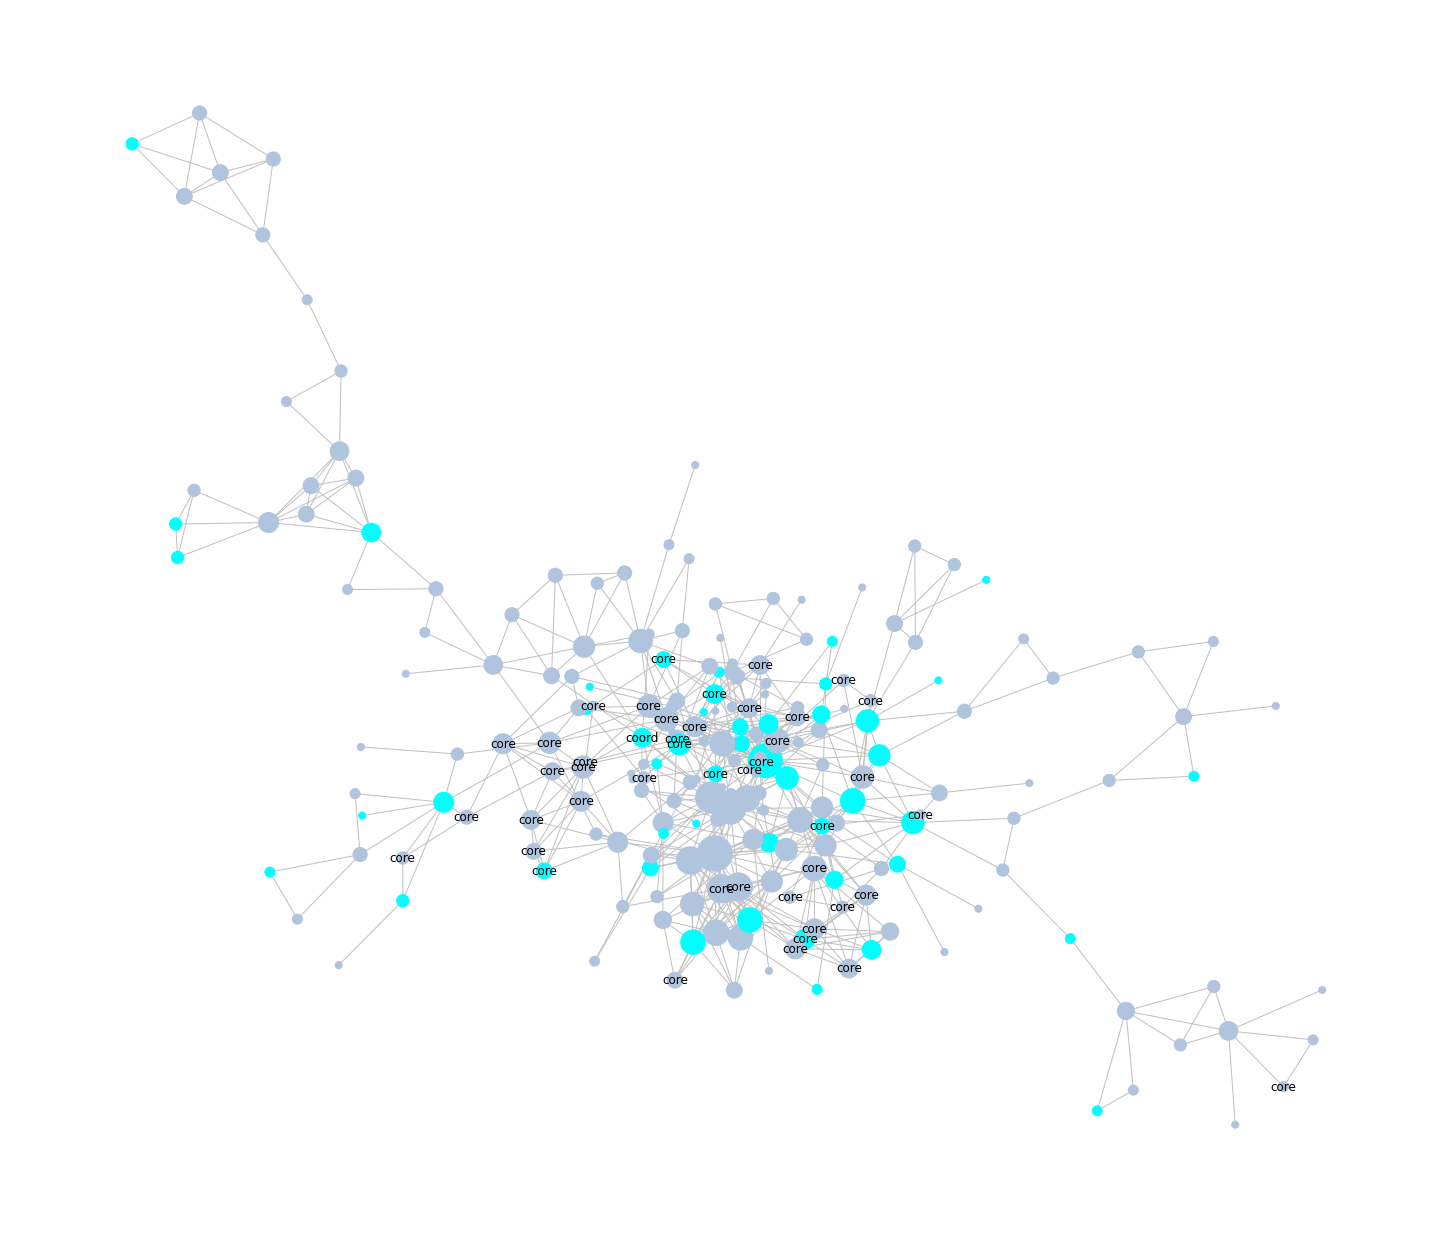

In [137]:
pos = nx.kamada_kawai_layout(G_post)

nx.draw(G_post, pos, node_size=[n*50 for n in dict(G_post.degree()).values()], node_color=node_colors,edge_color='silver', with_labels=True, labels=labels)

plt.rcParams['figure.figsize'] = [20, 17]
# Set the axis to be off
plt.axis('off')
plt.show()